In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Caricamento del dataset
df = pd.read_csv('../data/processed/listings_palermo.csv')

In [15]:
# Mostra i valori unici dei quartieri per cercare errori
print(df['neighbourhood_cleansed'].unique())

['Palermo' 'Partinico' 'Santa Flavia' 'Ustica' 'Villabate' 'Lascari'
 'Roccapalumba' 'Balestrate' 'Castelbuono' 'Collesano'
 'Santa Cristina Gela' 'Trabia' 'Cefalù' 'Altavilla Milicia' 'Borgetto'
 'Cinisi' 'Capaci' 'Campofelice di Roccella' 'Termini Imerese' 'Pollina'
 'Corleone' 'Petralia Sottana' 'Casteldaccia' 'Monreale' 'Carini'
 'Caccamo']


In [11]:
# Correggi nomi errati (es. 'Cefal' → 'Cefalù')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace({
    'Cefal': 'Cefalù',
    'Cefalu': 'Cefalù',  # se ci sono anche varianti senza accento
    'cefalu': 'Cefalù'   # gestione case insensitive
})

In [12]:
# Selezione delle colonne rilevanti
df_clean = df[['neighbourhood_cleansed', 'review_scores_rating']].dropna()

In [13]:

# Calcolo del punteggio medio per quartiere (top 15)
avg_rating_by_neigh = (
    df_clean.groupby('neighbourhood_cleansed')['review_scores_rating']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

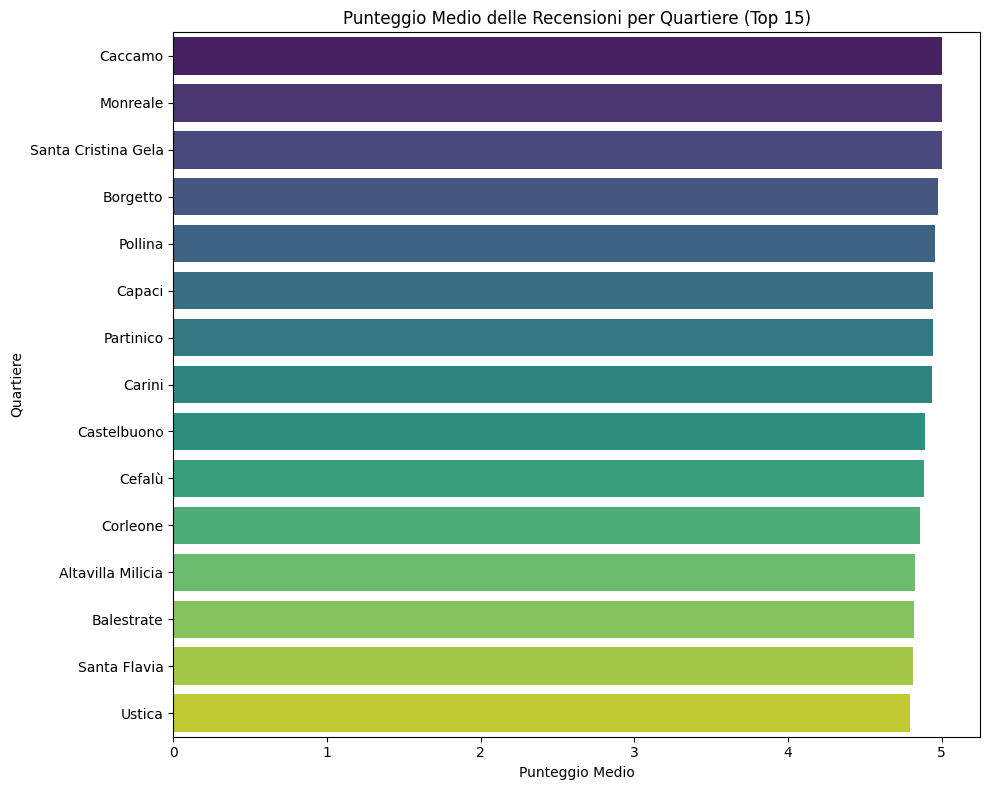

In [14]:
# Creazione del barplot con hue esplicito
plt.figure(figsize=(10, 8))
sns.barplot(
    data=avg_rating_by_neigh,
    x='review_scores_rating',
    y='neighbourhood_cleansed',
    hue='neighbourhood_cleansed',
    palette='viridis',
    legend=False
)
plt.title('Punteggio Medio delle Recensioni per Quartiere (Top 15)')
plt.xlabel('Punteggio Medio')
plt.ylabel('Quartiere')
plt.tight_layout()
plt.show()